# NBEATS metrics
Model: NBEATS

Dataset: electricity, exchange rate, solar_nips, traffic_nips

In this notebook we investigate the difference in evaulation scores when the same model is trained and tested multiple times with the same settings but different random seeds. We also explore if the best and worst seeds are consistently good or bad across all timeseries.

In [1]:
import matplotlib.pyplot as plt

from src.metrics import *

In [2]:
metric = ["MAPE"]
n = 10

### Exchange rate

In [3]:
experiment_path = "/datadrive/experiments/n_beats/exchange_rate/1B"
exp = load_data(experiment_path)

len(exp)

100

In [4]:
exp[0].head()

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,0.000962,0.722113,31.091047,1.036368,0.008791,2.738087,0.023216,0.023425,NaN,109.523461,0.481106,0.333333,0.722113,0.333333,0.963120,0.333333
1,1.0,0.002274,1.051258,47.975410,1.599180,0.016455,2.129528,0.021923,0.021876,NaN,85.181112,1.117872,0.500000,1.051258,0.500000,0.984644,0.500000
2,2.0,0.001126,0.740029,30.113565,1.003786,0.006396,3.857013,0.024574,0.024180,NaN,154.280522,1.134965,0.700000,0.740029,0.700000,0.345093,0.700000
3,3.0,0.001017,0.702126,31.995962,1.066532,0.009511,2.460843,0.021971,0.021911,NaN,98.433728,0.713563,0.466667,0.702126,0.466667,0.690689,0.466667
4,4.0,0.000090,0.208844,4.801961,0.160065,0.000207,33.604457,0.043479,0.043408,NaN,1344.178154,0.189624,0.433333,0.208844,0.433333,0.228064,0.433333


In [5]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 0.0011420066254853737
		Std: 0.00042854377966371893
		Variance: 0.02070129898493616

	Worst seeds:
		Mean: 0.002021264284849167
		Std: 0.0002800297806970775
		Variance: 0.016734089702367783

	Best seeds:
		Mean: 0.0006115338765084743
		Std: 6.400933489203453e-05
		Variance: 0.00800058338791132


MASE SCORES
	All seeds:
		Mean: 18.43939979005259
		Std: 4.1193258037148786
		Variance: 2.0296122298889703

	Worst seeds:
		Mean: 26.657562255859375
		Std: 2.9545884132385254
		Variance: 1.7188916206359863

	Best seeds:
		Mean: 12.06610107421875
		Std: 0.9995895028114319
		Variance: 0.9997947216033936


MAPE SCORES
	All seeds:
		Mean: 0.1163536205351043
		Std: 0.027043751365961582
		Variance: 0.16444984453006206

	Worst seeds:
		Mean: 0.1704358458518982
		Std: 0.020134368911385536
		Variance: 0.1418956220149994

	Best seeds:
		Mean: 0.0751357302069664
		Std: 0.00743995001539588
		Variance: 0.08625514805316925




In [6]:
exp_array = calculate_timeseries_means(exp, metric, 8)
exp_array.shape

(100, 8, 1)

In [7]:
exp[0].head(10)

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,0.000962,0.722113,31.091047,1.036368,0.008791,2.738087,0.023216,0.023425,NaN,109.523461,0.481106,0.333333,0.722113,0.333333,0.963120,0.333333
8,0.0,0.000968,0.730151,31.412418,1.047081,0.008773,2.774356,0.023212,0.023408,NaN,110.974226,0.508817,0.400000,0.730151,0.400000,0.951484,0.400000
16,0.0,0.000882,0.714271,31.442495,1.048083,0.008757,2.718732,0.022707,0.022701,NaN,108.749311,0.705264,0.500000,0.714271,0.500000,0.723277,0.500000
24,0.0,0.001256,0.810845,31.072994,1.035766,0.008744,3.091040,0.026122,0.025693,NaN,123.641575,1.224000,0.733333,0.810845,0.733333,0.397691,0.733333
32,0.0,0.000923,0.737773,30.949823,1.031661,0.008724,2.818989,0.023788,0.023786,NaN,112.759559,0.771848,0.566667,0.737773,0.566667,0.703698,0.566667
1,1.0,0.002274,1.051258,47.975410,1.599180,0.016455,2.129528,0.021923,0.021876,NaN,85.181112,1.117872,0.500000,1.051258,0.500000,0.984644,0.500000
9,1.0,0.002717,1.204570,48.259655,1.608655,0.016415,2.446053,0.024939,0.025232,NaN,97.842110,0.756860,0.300000,1.204570,0.300000,1.652279,0.300000
17,1.0,0.002241,1.069936,48.184841,1.606161,0.016369,2.178726,0.022218,0.022154,NaN,87.149036,1.165407,0.533333,1.069936,0.533333,0.974466,0.533333
25,1.0,0.003121,1.311564,46.918461,1.563949,0.016344,2.674960,0.028003,0.027553,NaN,106.998391,1.995433,0.733333,1.311564,0.733333,0.627694,0.733333


(array([0., 0., 0., 2., 0., 3., 0., 3., 0., 0., 0., 0., 1., 0., 0., 2., 4.,
        0., 0., 0., 4., 0., 0., 1., 0., 2., 0., 0., 0., 6., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 2., 5.,
        0., 0., 0., 0., 1., 0., 0., 4., 0., 1., 7., 4., 0., 0., 0., 7., 0.,
        2., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 1., 4., 0.]),
 array([83, 78, 29, 65, 67, 20, 16, 75, 79, 89]),
 array([7., 7., 6., 6., 5., 4., 4., 4., 4., 4.]))

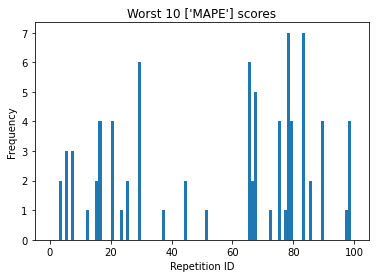

In [8]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 3., 6., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        0., 0., 0., 0., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 6., 4., 0.,
        0., 0., 0., 3., 0., 2., 0., 0., 0., 0., 5., 6., 1., 1., 0., 5., 0.,
        0., 1., 0., 0., 2., 1., 1., 0., 6., 0., 0., 0., 3., 0., 2., 0., 0.,
        0., 0., 0., 0., 0., 0., 6., 0., 0., 2., 2., 0., 0., 0., 1.]),
 array([24, 76, 62, 91, 48, 66, 61, 49, 80, 54]),
 array([6., 6., 6., 6., 6., 5., 5., 4., 3., 3.]))

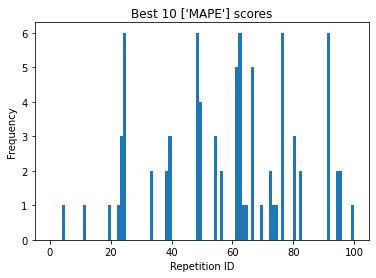

In [9]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Traffic nips

In [10]:
experiment_path = "/datadrive/experiments/n_beats/traffic_nips/1B"
exp = load_data(experiment_path)

len(exp)

100

In [11]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 0.001123761201830245
		Std: 0.00013427244285867942
		Variance: 0.011587598666621114

	Worst seeds:
		Mean: 0.001431258162483573
		Std: 9.34355120989494e-05
		Variance: 0.009666204452514648

	Best seeds:
		Mean: 0.0009322197875007987
		Std: 3.054207263630815e-05
		Variance: 0.005526488181203604


MASE SCORES
	All seeds:
		Mean: 1.4090454290160317
		Std: 0.1342551119439463
		Variance: 0.3664083950238399

	Worst seeds:
		Mean: 1.6741435527801514
		Std: 0.0709577351808548
		Variance: 0.2663789391517639

	Best seeds:
		Mean: 1.1949644088745117
		Std: 0.03767998889088631
		Variance: 0.1941133439540863


MAPE SCORES
	All seeds:
		Mean: 0.5301290610799341
		Std: 0.11106458718622145
		Variance: 0.33326354013936393

	Worst seeds:
		Mean: 0.7677550315856934
		Std: 0.1185787096619606
		Variance: 0.3443526029586792

	Best seeds:
		Mean: 0.3946552276611328
		Std: 0.012645703740417957
		Variance: 0.11245311796665192




In [12]:
exp_array = calculate_timeseries_means(exp, metric, 963)
exp_array.shape

(100, 963, 1)

(array([  0.,   3., 265., 103., 915.,  93.,   0.,   2.,   0.,   2.,   0.,
        509.,   0.,   0.,   0.,   0., 946., 147.,   0.,   0.,   0.,  20.,
         26.,  44.,  33.,   0.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,
        960.,   0., 370.,   0.,   0.,   0., 193.,   0.,   5.,   0.,   0.,
          0., 110.,   5.,  89.,   1.,   0.,   0.,   0.,  12.,  10.,  45.,
        725.,   2.,   0., 859.,   0.,   4.,   2.,   0., 651.,   0.,   0.,
          4., 392.,   0.,   0.,   0.,   0.,   0.,   0., 813., 269.,   0.,
          2.,   1.,  31.,   0., 520.,   0.,   0.,   0., 400.,   0.,   0.,
          0.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,  15.,   0.,  24.,
          2.]),
 array([33, 16,  4, 58, 74, 55, 63, 81, 11, 85]),
 array([960., 946., 915., 859., 813., 725., 651., 520., 509., 400.]))

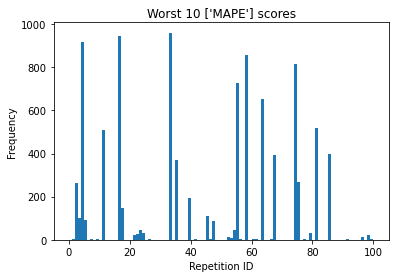

In [13]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([754.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   9.,  79.,  52.,
          0.,  21., 257., 265.,   0.,   1.,   0., 198.,   3.,   0.,  33.,
          0.,   1.,   0.,   0.,   0.,  65., 569., 314.,   0.,   9.,  73.,
          0., 645.,   1.,  22.,   5., 159.,   0.,   6.,   1.,   0.,   1.,
          1.,   4.,   0.,   0., 867., 296.,  42.,  73.,   0.,   0.,   0.,
          1.,  13., 479.,   0., 688.,   1., 209., 180.,   0., 639.,   0.,
          0.,   0., 239.,   6., 719.,  28.,  64.,   0.,   0.,   0., 212.,
         46.,   7.,   6., 193.,   0.,   4.,  90., 329.,   2.,   1., 147.,
         16., 279.,  12.,  80.,   0.,   1.,   2.,   3.,   0., 107.,   0.,
          0.]),
 array([48,  0, 70, 59, 34, 64, 28, 57, 84, 29]),
 array([867., 754., 719., 688., 645., 639., 569., 479., 329., 314.]))

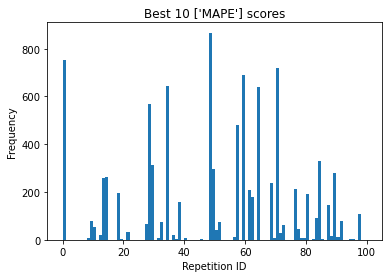

In [14]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Solar nips

In [15]:
experiment_path = "/datadrive/experiments/n_beats/solar_nips/1B"
exp = load_data(experiment_path)

len(exp)

100

In [16]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 3542.2756464046015
		Std: 79.25507332601263
		Variance: 8.902531849199566

	Worst seeds:
		Mean: 3686.94091796875
		Std: 36.77642822265625
		Variance: 6.064357280731201

	Best seeds:
		Mean: 3392.3125
		Std: 42.30546569824219
		Variance: 6.504265308380127


MASE SCORES
	All seeds:
		Mean: 2.3330710511155854
		Std: 0.043580745590038966
		Variance: 0.20876001913690026

	Worst seeds:
		Mean: 2.421292781829834
		Std: 0.04219072312116623
		Variance: 0.20540380477905273

	Best seeds:
		Mean: 2.26420521736145
		Std: 0.01746710017323494
		Variance: 0.1321631520986557


MAPE SCORES
	All seeds:
		Mean: 0.6926355293499317
		Std: 0.1523465362170576
		Variance: 0.39031594409792897

	Worst seeds:
		Mean: 1.0321179628372192
		Std: 0.10079722851514816
		Variance: 0.3174857795238495

	Best seeds:
		Mean: 0.5064210891723633
		Std: 0.022270135581493378
		Variance: 0.14923182129859924




In [17]:
exp_array = calculate_timeseries_means(exp, metric, 137)
exp_array.shape

(100, 137, 1)

(array([  0.,   4.,  19.,   3.,  10.,  19.,   0.,   0.,   0., 109.,   0.,
          0.,  14.,  14.,   0.,   3.,  37.,  37.,   0.,   8.,  16.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  69.,  95.,   0.,   0., 111.,
          0.,   0.,  21.,   0.,  36.,   8.,  29.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,  67.,  63.,  46.,   0.,   0.,  26.,   0.,  60.,
          0.,   3.,   0.,   3.,   0.,  10.,  79.,  46.,  33.,   0.,   0.,
          0.,   8.,   0.,   1.,   9.,  20.,   0.,   2.,  14.,   0.,   1.,
          4.,   0.,  20.,  33.,  40.,  10.,   0.,   0.,   6.,   3.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,  75.,
         21.]),
 array([32,  9, 29, 61, 98, 28, 47, 48, 54, 49]),
 array([111., 109.,  95.,  79.,  75.,  69.,  67.,  63.,  60.,  46.]))

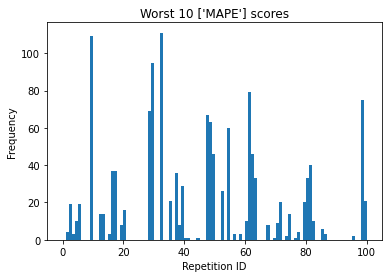

In [18]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([34., 13., 11., 10., 10., 14., 20., 31.,  0.,  0.,  9., 11.,  0.,
        53., 11., 30.,  1.,  1., 25.,  6.,  0.,  5., 40.,  6., 10., 12.,
         2., 52.,  0.,  0., 17.,  5.,  0., 22., 34.,  2.,  3., 48.,  2.,
        20., 13.,  2., 26., 11., 10., 21., 13.,  0.,  4., 27., 29., 13.,
        31., 27., 28., 58., 23., 20., 18., 11.,  1.,  0.,  1.,  1.,  6.,
        11., 13.,  4., 15., 11., 12.,  0., 17.,  7.,  6., 12., 14., 18.,
         6., 10.,  0.,  0.,  1.,  0., 11., 15., 17., 16.,  6., 32., 23.,
        39., 24.,  3.,  8., 25., 27.,  1.,  0.,  2.]),
 array([55, 13, 27, 37, 22, 91,  0, 34, 89,  7]),
 array([58., 53., 52., 48., 40., 39., 34., 34., 32., 31.]))

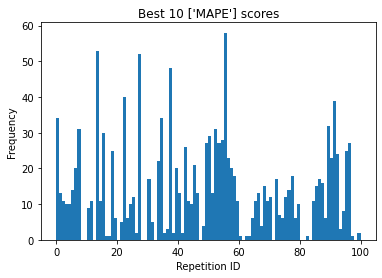

In [19]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Electricity

In [20]:
experiment_path = "/datadrive/experiments/n_beats/electricity/1B"
exp = load_data(experiment_path)

len(exp)

100

In [21]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 3097874.905570581
		Std: 958889.1950279403
		Variance: 979.2288777542972

	Worst seeds:
		Mean: 5141511.5
		Std: 831749.625
		Variance: 912.0031127929688

	Best seeds:
		Mean: 1918012.375
		Std: 177863.421875
		Variance: 421.7385559082031


MASE SCORES
	All seeds:
		Mean: 1.1265399264318043
		Std: 0.10438832577635096
		Variance: 0.32309182251544366

	Worst seeds:
		Mean: 1.352257490158081
		Std: 0.030773133039474487
		Variance: 0.17542272806167603

	Best seeds:
		Mean: 0.9991191029548645
		Std: 0.0124543821439147
		Variance: 0.11159919947385788


MAPE SCORES
	All seeds:
		Mean: 0.1609537012072698
		Std: 0.010915267018364396
		Variance: 0.10447615526216686

	Worst seeds:
		Mean: 0.18463167548179626
		Std: 0.005770458839833736
		Variance: 0.07596353441476822

	Best seeds:
		Mean: 0.14625434577465057
		Std: 0.002546534175053239
		Variance: 0.05046319589018822




In [22]:
exp_array = calculate_timeseries_means(exp, metric, 321)
exp_array.shape

(100, 321, 1)

(array([ 43.,   1.,   2.,  16., 142., 206.,  13.,   7.,  25.,   0.,   1.,
          5.,   4.,   1.,   0.,   1.,  11., 161.,   5., 232.,   3.,  47.,
         10.,  35.,  18.,   7.,  11.,  75.,   2.,   7., 238.,   3.,  24.,
          2.,   2.,   0.,   6.,   9.,   5.,   1.,   2.,  10.,  33.,   1.,
         99.,  27.,  21.,   2.,   1., 121.,   7.,  71.,   5.,   5.,   0.,
          4.,   0., 134.,   1.,   4.,  11.,  48.,  87.,   3.,  29.,   2.,
         45.,   1.,   3.,  66.,   1.,  43.,  20.,  11.,   0., 140.,   5.,
          2.,  19.,   2.,   5.,   0., 113.,   3.,  12., 224.,  35., 159.,
          2.,   2.,   9.,  31.,  19.,  16.,   9.,   0.,  15.,  63.,  11.,
         15.]),
 array([30, 19, 85,  5, 17, 87,  4, 75, 57, 49]),
 array([238., 232., 224., 206., 161., 159., 142., 140., 134., 121.]))

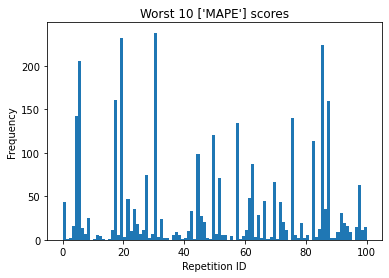

In [23]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([  4.,  78.,  56.,   8.,   5.,   3.,   2.,  23.,  30.,  42.,  14.,
         37.,   9., 173., 100.,  70.,   3.,   1.,  87.,   2.,  12.,  23.,
         15.,  55.,  16.,   8.,  10.,   6., 171.,  92.,   1., 166.,  22.,
         89.,  90., 121.,  31.,  37.,  11.,   8.,  17.,  38.,  10.,  20.,
          3.,  23.,  11.,  50.,  55.,  17.,  18.,   6.,  11.,  22.,  21.,
         46.,  90.,  12.,  57.,  16.,   3.,   0.,  12., 151.,   6.,  40.,
          6.,  88.,  17.,   1.,  24.,   8.,   7.,  69.,  50.,  10.,  18.,
         23.,  29.,   7.,  47.,  59.,   3.,  34.,   6.,   4.,   1.,  11.,
         86.,   6.,  20.,  11.,   6.,   4.,   3.,  20.,  27.,   1.,   9.,
          9.]),
 array([13, 28, 31, 63, 35, 14, 29, 56, 34, 33]),
 array([173., 171., 166., 151., 121., 100.,  92.,  90.,  90.,  89.]))

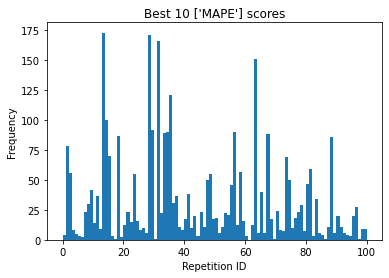

In [24]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]